In [64]:
import sys
print("Python Version is: " + sys.version)



Python Version is: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

#SNS Settings 
sns.set(color_codes = True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(7,4)})
sns.set_palette("Set3")

# Get multiple outputs in the same cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
#pd.set_option('display.max_rows', None)


In [66]:
import time
time_begin = time.time()

df = pd.read_csv("high_churn_list_model.csv") # data = pd.read_csv("census.csv")

print(f'Run time: {round(((time.time()-time_begin)/60), 3)} mins')

Run time: 0.001 mins


In [67]:
df.sample(2)

,CustomerID,Gender,Age,Married,NumberofDependents,City,ZipCode,Population,NumberofReferrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,Churn,ChurnCategory,ChurnReason,predictions,pred_probabilities
1901,1087-GRUYI,1,62,1,0,San Diego,92116,33083,8,38,Offer C,1,6.97,No,0,Unknown,0.00,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Two Year,0,Bank Withdrawal,20.40,743.50,0.00,0,264.86,1008.36,0,Unknown,Unknown,0,0.00
1786,3128-YOVTD,0,29,1,2,Forbestown,95941,452,6,51,NaN,1,2.53,No,1,Fiber Optic,71.00,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,1,Bank Withdrawal,79.15,4018.55,0.00,0,129.03,4147.58,0,Unknown,Unknown,0,0.00


In [68]:
# df.describe().transpose()[:-3] # Removing the last three as are "churn predicitons and probabilities "

In [69]:
df.describe(include = ['O']).transpose()[1:] 
#removes CustomerID from the results
# O = Object

,count,unique,top,freq
City,2095,876,Los Angeles,93
Offer,943,5,Offer E,251
MultipleLines,2095,3,No,1005
InternetType,2095,4,Fiber Optic,933
OnlineSecurity,2095,3,No,1065
OnlineBackup,2095,3,No,920
DeviceProtectionPlan,2095,3,No,956
PremiumTechSupport,2095,3,No,1064
StreamingTV,2095,3,No,865
StreamingMovies,2095,3,No,842


In [70]:
df.describe(exclude = ['O']).transpose()[:-3]

,count,mean,std,min,25%,50%,75%,max
Gender,2095.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Age,2095.00,46.68,16.80,19.00,32.00,46.00,60.00,80.00
Married,2095.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
NumberofDependents,2095.00,0.46,0.98,0.00,0.00,0.00,0.00,8.00
ZipCode,2095.00,93521.26,1860.72,90001.00,92109.00,93550.00,95359.00,96150.00
Population,2095.00,21501.67,20232.50,11.00,2347.50,16717.00,35109.00,82630.00
NumberofReferrals,2095.00,1.95,3.00,0.00,0.00,0.00,3.00,10.00
TenureinMonths,2095.00,31.95,24.33,1.00,8.00,28.00,55.00,72.00
PhoneService,2095.00,0.91,0.29,0.00,1.00,1.00,1.00,1.00
AvgMonthlyLongDistanceCharges,2095.00,22.78,15.45,0.00,9.27,22.30,36.36,49.99


### Determining how many "churned" 

In [71]:
df['Churn'].value_counts()
# 0 = did not exit

Churn
0    1537
1     558
Name: count, dtype: int64

### Comparing churned to various features

In [72]:
df.groupby(['Married']).agg({'Churn': 'mean'}).reset_index().sort_values(by='Churn', ascending=False)
# If you are not married, your chances of churning are on average 33%
# If you are marrried, your chances of churning are on average 20% 

,Married,Churn
0,0,0.33
1,1,0.20


In [73]:
df.groupby(['Gender']).agg({'Churn': 'mean'}).reset_index().sort_values(by='Churn', ascending=False)
# If you are a female (0), your chances of churning are on average 27%
# If you are a male (1), your chances of churning are on average 26%

,Gender,Churn
0,0,0.27
1,1,0.26


In [74]:
df.groupby(['Gender','Married']).agg({'Churn': 'mean'}).reset_index().sort_values(by='Churn', ascending=False)
# The highest churn grouping is a female who is not married (34%). 
# Next is a male who is not married (32%). 

,Gender,Married,Churn
0,0,0,0.35
2,1,0,0.31
3,1,1,0.20
1,0,1,0.19


In [75]:
# histo_plots = pd.DataFrame(data =df, columns =  ['Total Revenue','Total Long Distance Charges'])

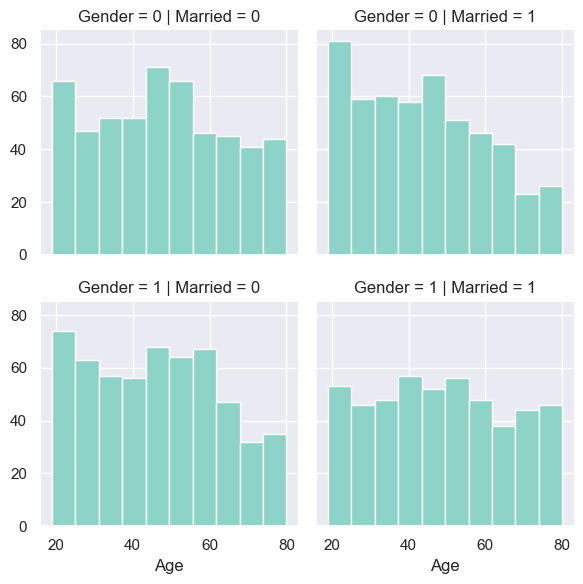

In [76]:
g = sns.FacetGrid(df, col = "Married", row = 'Gender')
g = g.map(plt.hist, "Age")
# 0 = Female, 1 = Male
# 0 = Not married, 1 = married

Black lines are means


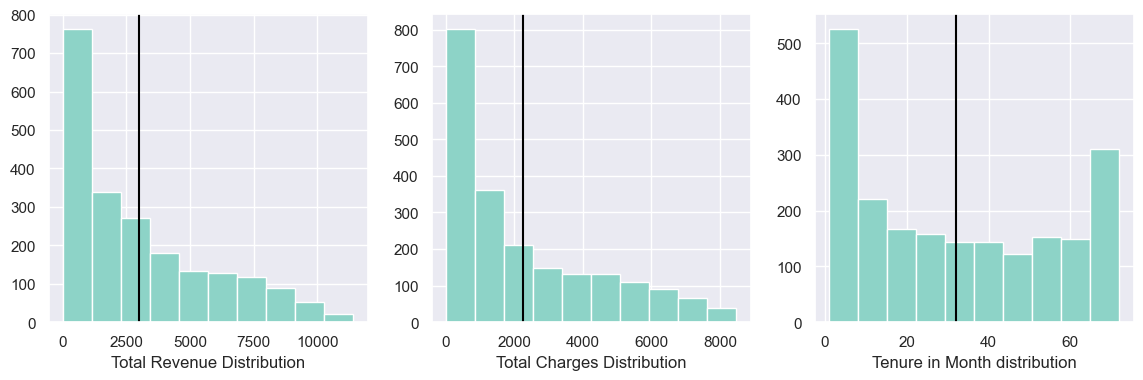

In [77]:
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df['TotalRevenue'])
ax0.set_xlabel('Total Revenue Distribution')
ax0.axvline(df['TotalRevenue'].mean(), color = "black")

ax1.hist(df.TotalCharges)
ax1.set_xlabel('Total Charges Distribution')
ax1.axvline(df["TotalCharges"].mean(), color = "black");

ax2.hist(df.TenureinMonths)
ax2.set_xlabel('Tenure in Month distribution')
ax2.axvline(df['TenureinMonths'].mean(), color = "black");

print("Black lines are means")

Black lines are means


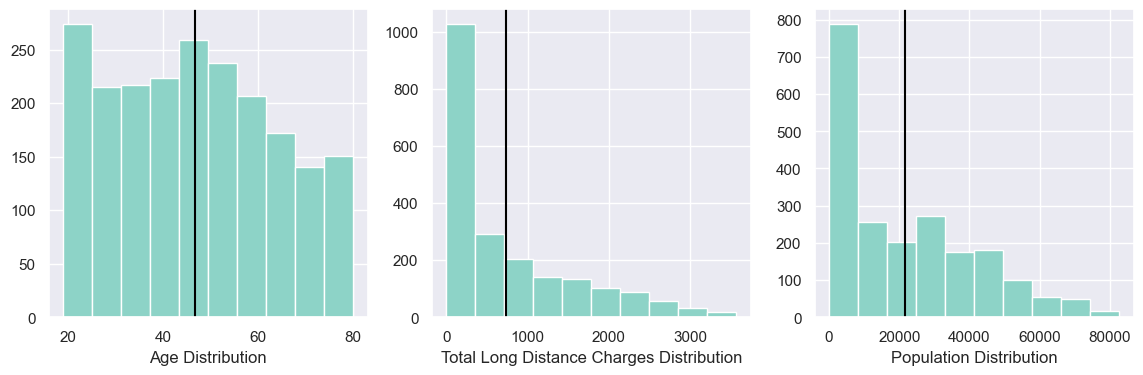

In [78]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df['Age'])
ax0.set_xlabel('Age Distribution')
ax0.axvline(df['Age'].mean(), color = "black")

ax1.hist(df['TotalLongDistanceCharges'])
ax1.set_xlabel('Total Long Distance Charges Distribution')
ax1.axvline(df["TotalLongDistanceCharges"].mean(), color = "black");

ax2.hist(df['Population'])
ax2.set_xlabel('Population Distribution')
ax2.axvline(df['Population'].mean(), color = "black");

print("Black lines are means")

<Axes: xlabel='count', ylabel='TotalExtraDataCharges'>

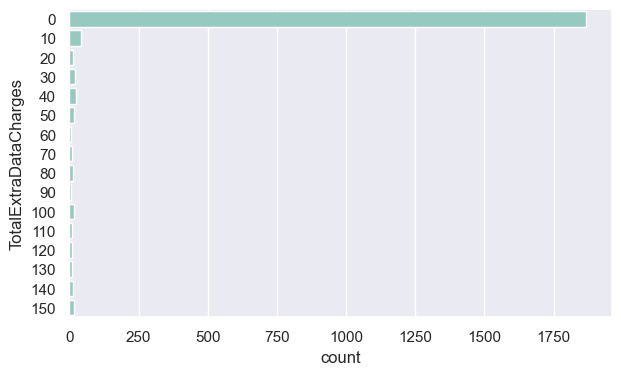

In [79]:
sns.countplot(y = df['TotalExtraDataCharges'])

<Axes: xlabel='TotalRefunds'>

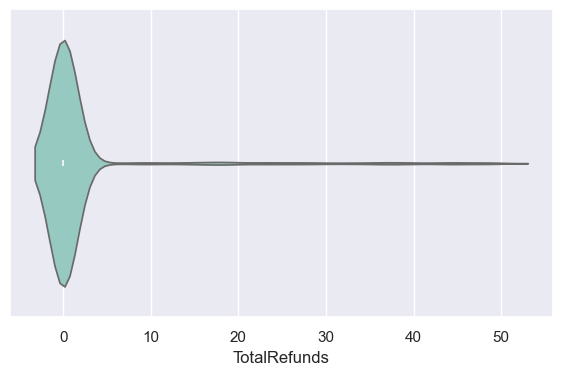

In [80]:
sns.violinplot(x=df['TotalRefunds'])

<Axes: xlabel='MonthlyCharge'>

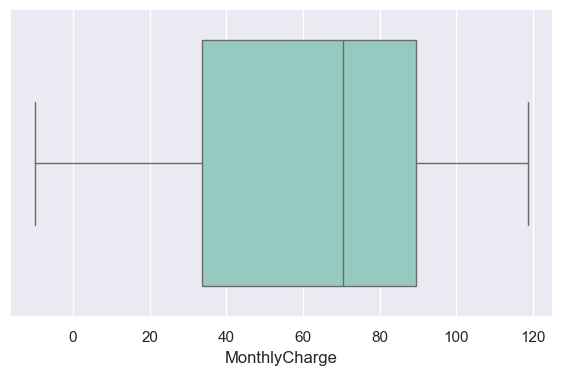

In [81]:
sns.boxplot(x=df['MonthlyCharge'])

<Axes: xlabel='count', ylabel='PaymentMethod'>

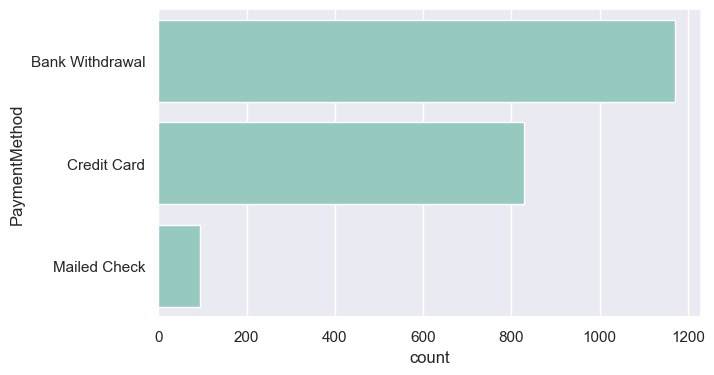

In [82]:
sns.countplot(df['PaymentMethod'])

<Axes: xlabel='count', ylabel='ChurnCategory'>

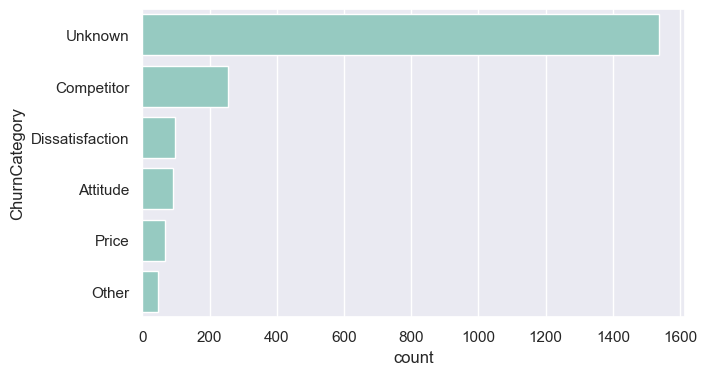

In [83]:
sns.countplot(y=df['ChurnCategory'],order = df['ChurnCategory'].value_counts().index)

<Axes: xlabel='count', ylabel='ChurnReason'>

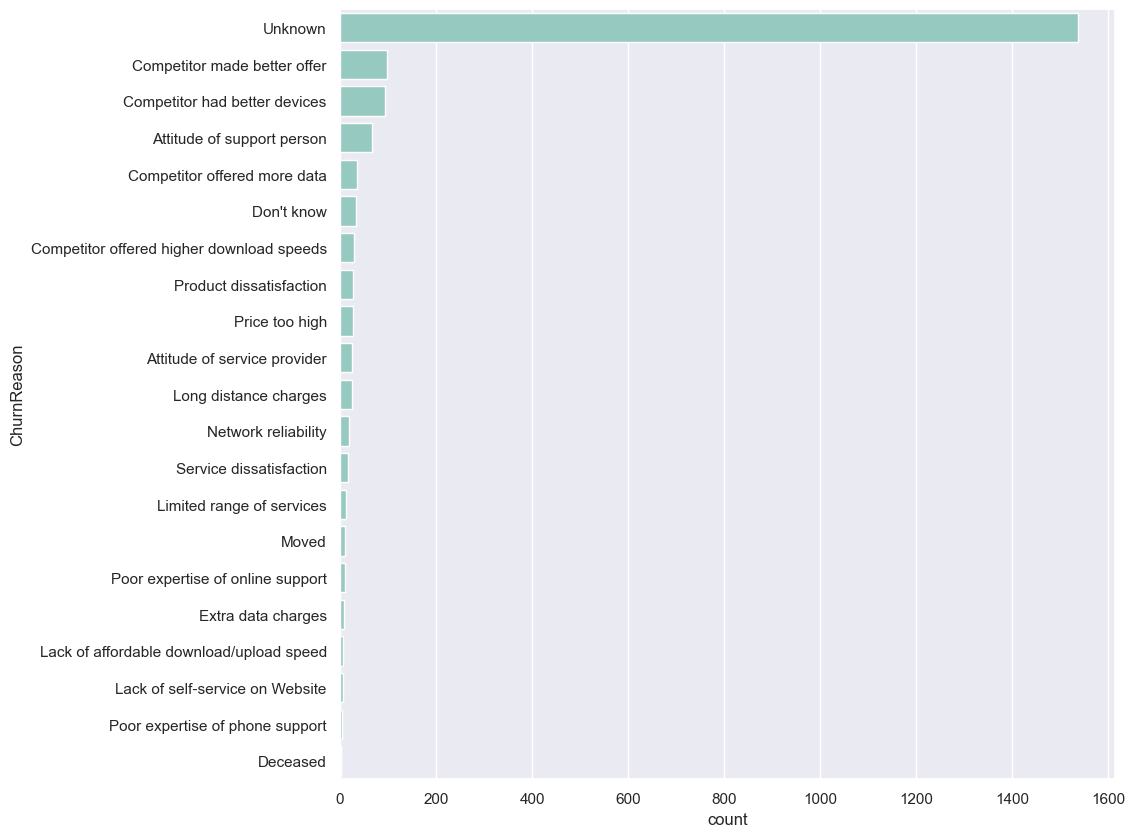

In [84]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['ChurnReason'],order = df['ChurnReason'].value_counts().index)

<Axes: ylabel='count'>

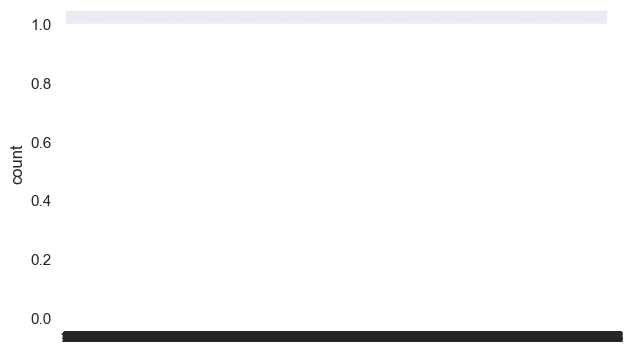

In [85]:
sns.countplot(df['PhoneService'])

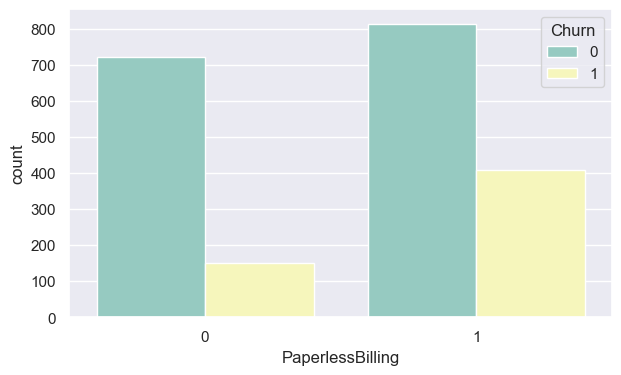

In [86]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.show()

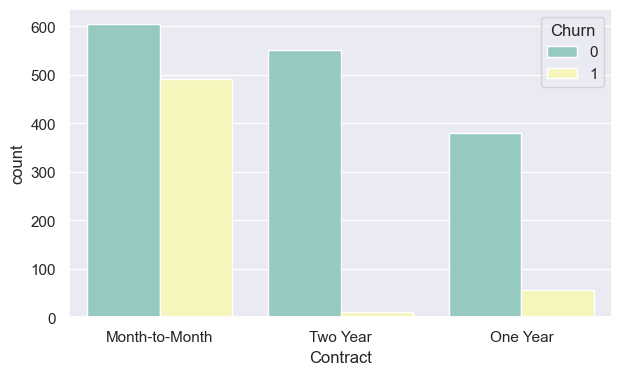

In [87]:
sns.countplot(
    data=df,
    x='Contract',
    hue='Churn',
    order=df['Contract'].value_counts().index
)
plt.show()


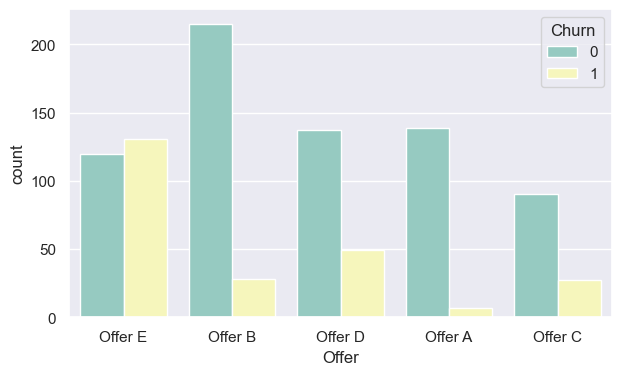

In [88]:
sns.countplot(
    data=df,
    x='Offer',
    hue='Churn',
    order=df['Offer'].value_counts().index
)
plt.show()


<Axes: xlabel='count', ylabel='InternetType'>

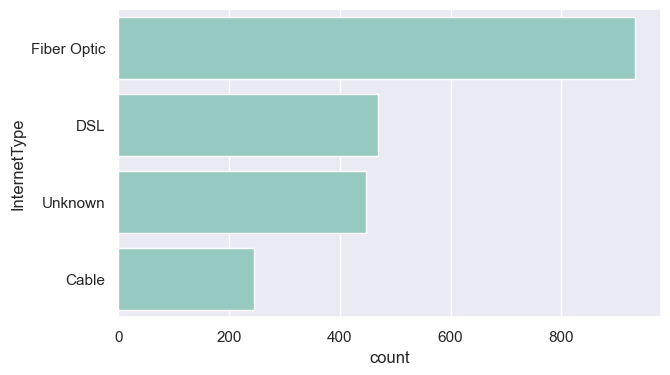

In [89]:
sns.countplot(df['InternetType'], order = df['InternetType'].value_counts().index)

## Exploratory data analysis

###  Is there some association between personal characteristics and those who churned?
#### QUANTATIVE VARIABLES

In [90]:
quant_df1 = df[[ #nominal
 'Churn',
 'Age',
 'NumberofDependents',
 'Population',
 'NumberofReferrals',
 'TenureinMonths',
 'AvgMonthlyLongDistanceCharges',
'AvgMonthlyGBDownload',
 'MonthlyCharge',
 'TotalCharges',
 'TotalRefunds',
 'TotalExtraDataCharges',
 'TotalLongDistanceCharges',
 'TotalRevenue'
]].copy()

# categorical columns

quant_df2 = df[[ #binary
#'Churn',
'Gender',
'Married',
'PhoneService',
'InternetService',
'PaperlessBilling'
]].copy()

quant_df3 = df[[ #categories (one-hot-encode)
 #'Churn',
 'Offer',
 #'MultipleLines',
 #'InternetType',
 #'OnlineSecurity',
 'OnlineBackup',
 #'DeviceProtectionPlan',
 'PremiumTechSupport',
 'StreamingTV',
 'StreamingMovies',
 'StreamingMusic',
 #'UnlimitedData',
 'Contract',
 #'PaymentMethod',
]].copy()


In [91]:
quant_df1.corr()

,Churn,Age,NumberofDependents,Population,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue
Churn,1.00,0.13,-0.21,0.08,-0.30,-0.37,0.02,0.02,0.16,-0.22,-0.02,0.02,-0.22,-0.24
Age,0.13,1.00,-0.09,-0.02,-0.04,-0.01,-0.00,-0.36,0.14,0.05,0.00,0.05,0.01,0.04
NumberofDependents,-0.21,-0.09,1.00,-0.02,0.28,0.14,-0.01,0.17,-0.10,0.04,-0.01,-0.01,0.09,0.06
Population,0.08,-0.02,-0.02,1.00,-0.04,-0.05,-0.04,0.01,-0.00,-0.04,0.05,0.01,-0.05,-0.05
NumberofReferrals,-0.30,-0.04,0.28,-0.04,1.00,0.35,0.02,0.07,0.06,0.29,0.03,-0.00,0.26,0.31
TenureinMonths,-0.37,-0.01,0.14,-0.05,0.35,1.00,0.02,0.06,0.22,0.83,0.00,0.08,0.68,0.85
AvgMonthlyLongDistanceCharges,0.02,-0.00,-0.01,-0.04,0.02,0.02,1.00,-0.03,0.11,0.07,-0.00,0.02,0.60,0.23
AvgMonthlyGBDownload,0.02,-0.36,0.17,0.01,0.07,0.06,-0.03,1.00,0.37,0.24,0.02,0.04,0.02,0.19
MonthlyCharge,0.16,0.14,-0.10,-0.00,0.06,0.22,0.11,0.37,1.00,0.60,0.03,0.14,0.21,0.54
TotalCharges,-0.22,0.05,0.04,-0.04,0.29,0.83,0.07,0.24,0.60,1.00,0.01,0.13,0.61,0.97


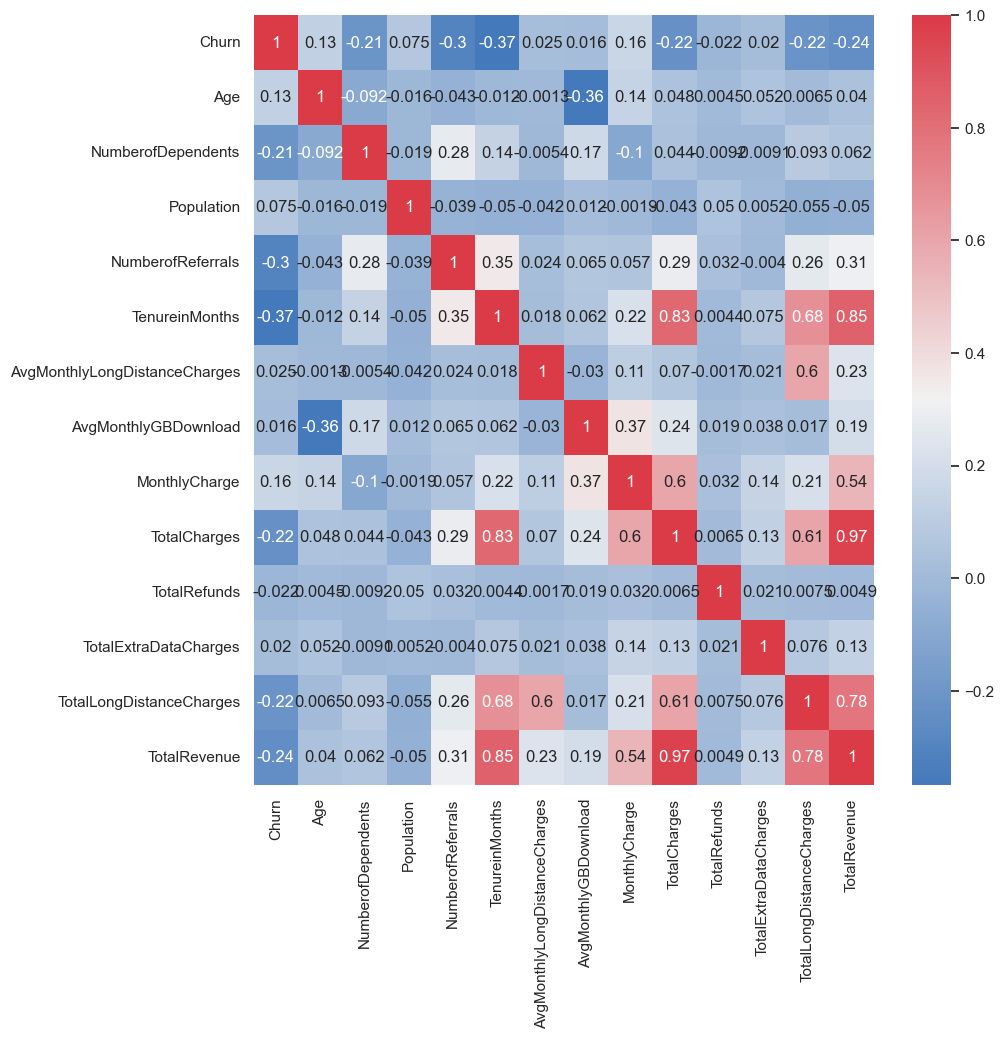

In [92]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(quant_df1.corr(), cmap = cmap, annot = True);


In [93]:
# get association coefficients for 'Personal Loan' and exclude it's data from series
quant_df1.corr()['Churn'][1:]

Age                              0.13
NumberofDependents              -0.21
Population                       0.08
NumberofReferrals               -0.30
TenureinMonths                  -0.37
AvgMonthlyLongDistanceCharges    0.02
AvgMonthlyGBDownload             0.02
MonthlyCharge                    0.16
TotalCharges                    -0.22
TotalRefunds                    -0.02
TotalExtraDataCharges            0.02
TotalLongDistanceCharges        -0.22
TotalRevenue                    -0.24
Name: Churn, dtype: float64

In [94]:
print(quant_df1.columns)

Index(['Churn', 'Age', 'NumberofDependents', 'Population', 'NumberofReferrals',
       'TenureinMonths', 'AvgMonthlyLongDistanceCharges',
       'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue'],
      dtype='object')


In [95]:
# quant_df1.corr()['Churn'][1:].plot.bar()
# plt.axhline(y = 0.05);

Let's check our confidense about this statment with logistic regression model:

In [96]:
quant_df1['intercept'] = 1
log_mod = sm.Logit(quant_df1['Churn'], quant_df1[['intercept','Age', 'NumberofDependents', 'Population', 'NumberofReferrals',
       'TenureinMonths', 'AvgMonthlyLongDistanceCharges','AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges','TotalRevenue']]).fit()
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419326
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2082
Method:                           MLE   Df Model:                           12
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.2765
Time:                        01:58:22   Log-Likelihood:                -878.49
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                5.482e-136
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -1.5502      0.304     -5.092      0.000      -2.147      -0.954
Age                               0.0152      0.004      3.779      0.000       0.007       0.023
NumberofDependents               -0.4782      0.103     -4.657      0.000      -0.679      -0.277
Population                     7.153e-06   2.87e-06      2.495      0.013    1.53e-06    1.28e-05
NumberofReferrals                -0.2881      0.038     -7.628      0.000      -0.362      -0.214
TenureinMonths                   -0.0677      0.010     -6.472      0.000      -0.088      -0.047
AvgMonthlyLongDistanceCharges    -0.0113      0.006     -1.995      0.046      -0.022      -0.000
AvgMonthlyGBDownload              0.0055      0.004      1.487      0.137      -0.002       0.013
MonthlyCharge                     0.0218      0.003      6.772      0.000       0.015       0.028
TotalCharges                     -0.0005      0.000     -1.876      0.061      -0.001    2.03e-05
TotalRefunds                     -0.0061      0.008     -0.757      0.449      -0.022       0.010
TotalExtraDataCharges             0.0006      0.002      0.280      0.779      -0.004       0.005
TotalRevenue                      0.0006      0.000      2.849      0.004       0.000       0.001
=================================================================================================
"""

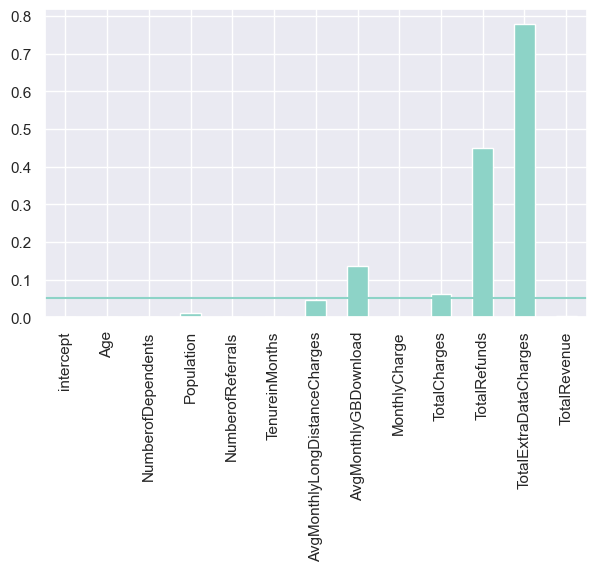

In [97]:
# p values
log_mod.pvalues[:].plot.bar()
plt.axhline(y = 0.05);

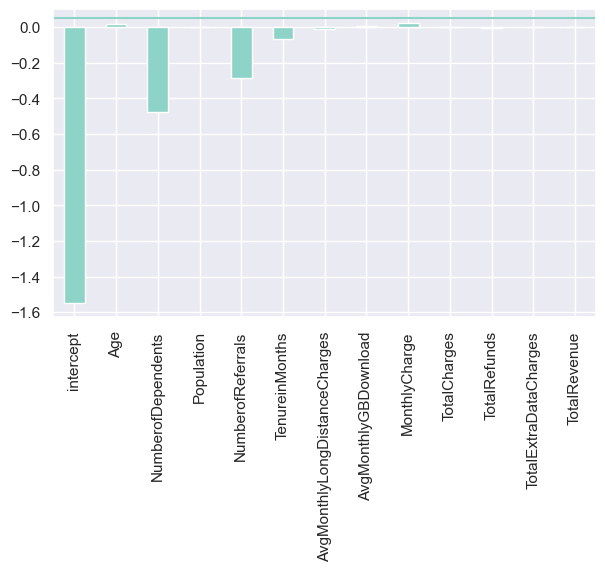

In [98]:
#coefficient
log_mod.params[:].plot.bar()
plt.axhline(y = 0.05);

In [99]:
quant_df_main = {}
for i in log_mod.params[:].to_dict().keys():
    if log_mod.pvalues[i] < 0.05:
        quant_df_main[i] = log_mod.params[i]
    else:
        continue
quant_df_main
sorted(quant_df_main.items(), key=lambda x: x[1]) #sorting by highest to lowest value

[('intercept', -1.5501574689605262),
 ('NumberofDependents', -0.4781870547717154),
 ('NumberofReferrals', -0.28808305338406925),
 ('TenureinMonths', -0.06765171718218498),
 ('AvgMonthlyLongDistanceCharges', -0.011259463742128328),
 ('Population', 7.153223010203928e-06),
 ('TotalRevenue', 0.0005601071073698739),
 ('Age', 0.015211057599616976),
 ('MonthlyCharge', 0.021755369254524076)]

#### Compute the odds

In [100]:
quant_df_main_odds = {k : np.exp(v) for k, v in quant_df_main.items()}
sorted(quant_df_main_odds.items(), key=lambda x: x[1]) #sorting by highest to lowest value

[('intercept', 0.2122145539902933),
 ('NumberofDependents', 0.6199062297179322),
 ('NumberofReferrals', 0.7496993245873661),
 ('TenureinMonths', 0.9345859171174311),
 ('AvgMonthlyLongDistanceCharges', 0.9888036867838458),
 ('Population', 1.0000071532485946),
 ('TotalRevenue', 1.000560263996646),
 ('Age', 1.0153273345533305),
 ('MonthlyCharge', 1.0219937427965726)]

### Analysis
NumberofDependents, NumberofReferrals,TenureinMonths, AvgMonthlyLongDistanceCharges,TotalCharges are all negatively associated

Population, TotalRevenue, Age, MonthlyCharge are positively associated

USE bank-looking-for-clients
https://www.youtube.com/watch?v=z_BXANUOjJY

In [101]:
quant_df1['intercept'] = 1
log_mod2 = sm.Logit(quant_df1['Churn'], quant_df1[['intercept','Age','Population', 'MonthlyCharge','TotalRevenue']]).fit()
log_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.475116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2090
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.1803
Time:                        01:58:23   Log-Likelihood:                -995.37
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                 1.925e-93
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -2.9004      0.216    -13.451      0.000      -3.323      -2.478
Age               0.0140      0.003      4.211      0.000       0.007       0.020
Population     6.696e-06   2.69e-06      2.491      0.013    1.43e-06     1.2e-05
MonthlyCharge     0.0342      0.002     14.282      0.000       0.029       0.039
TotalRevenue     -0.0005   2.88e-05    -16.004      0.000      -0.001      -0.000
=================================================================================
"""

### Log Mod 2 (Binary)

In [102]:
quant_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            2095 non-null   int64
 1   Married           2095 non-null   int64
 2   PhoneService      2095 non-null   int64
 3   InternetService   2095 non-null   int64
 4   PaperlessBilling  2095 non-null   int64
dtypes: int64(5)
memory usage: 82.0 KB


In [103]:
quant_df1['intercept'] = 1
log_mod2 = sm.Logit(quant_df1['Churn'], quant_df2).fit()
log_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.562800
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2090
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 May 2025   Pseudo R-squ.:                 0.02897
Time:                        01:58:23   Log-Likelihood:                -1179.1
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                 1.902e-14
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Gender              -0.3192      0.098     -3.271      0.001      -0.510      -0.128
Married             -0.9272      0.101     -9.148      0.000      -1.126      -0.729
PhoneService        -0.9664      0.106     -9.117      0.000      -1.174      -0.759
InternetService      0.2870      0.115      2.490      0.013       0.061       0.513
PaperlessBilling     0.4793      0.110      4.355      0.000       0.264       0.695
====================================================================================
"""

In [104]:
quant_df_main2 = {}
for i in log_mod2.params[:].to_dict().keys():
    if log_mod2.pvalues[i] < 0.05:
        quant_df_main2[i] = log_mod2.params[i].round(4)
    else:
        continue
quant_df_main2
sorted(quant_df_main2.items(), key=lambda x: x[1]) #sorting by highe

[('PhoneService', -0.9664),
 ('Married', -0.9272),
 ('Gender', -0.3192),
 ('InternetService', 0.287),
 ('PaperlessBilling', 0.4793)]

In [105]:
quant_df_main_odds2 = {k : np.exp(v) for k, v in quant_df_main2.items()}
sorted(quant_df_main_odds2.items(), key=lambda x: x[1]) #sorting by highest to lowest value

[('PhoneService', 0.3804501964490625),
 ('Married', 0.3956600088557378),
 ('Gender', 0.7267301887330189),
 ('InternetService', 1.3324242134756759),
 ('PaperlessBilling', 1.6149435459572175)]

### Log Mod 3 (Category)

In [106]:
quant_df3 = df[[ #categories (one-hot-encode)
 'Churn',
 'Offer',
 #'MultipleLines',
 'InternetType',
 #'OnlineSecurity',
 #'OnlineBackup',
 #'DeviceProtectionPlan',
 #'PremiumTechSupport',
 #'StreamingTV',
 #'StreamingMovies',
 #'StreamingMusic',
 #'UnlimitedData', #Seems to be the issue
 'Contract',
 'PaymentMethod',
]].copy()

In [107]:
quant_df3.head()

,Churn,Offer,InternetType,Contract,PaymentMethod
0,1,NaN,Fiber Optic,Month-to-Month,Bank Withdrawal
1,1,NaN,Fiber Optic,Month-to-Month,Bank Withdrawal
2,1,NaN,Fiber Optic,Month-to-Month,Bank Withdrawal
3,1,NaN,DSL,Month-to-Month,Bank Withdrawal
4,1,Offer D,Fiber Optic,Month-to-Month,Bank Withdrawal


In [108]:
quant_df3 = pd.get_dummies(quant_df3)

In [109]:
#for i in quant_df3:
#    quant_df3[i] = quant_df3[i]*100
    


In [110]:
#quant_df3['Churn']=quant_df3['Churn']/100

In [111]:
quant_df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,2095.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00


In [112]:
quant_df3.shape

(2095, 16)

In [113]:
print(quant_df3.columns)


Index(['Churn', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'InternetType_Cable',
       'InternetType_DSL', 'InternetType_Fiber Optic', 'InternetType_Unknown',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'PaymentMethod_Bank Withdrawal', 'PaymentMethod_Credit Card',
       'PaymentMethod_Mailed Check'],
      dtype='object')


In [114]:
#quant_df3['intercept'] = 1
log_mod3 = sm.Logit(quant_df3['Churn'], quant_df3[['Offer_Offer A','Offer_Offer B',
                                                   'Offer_Offer C','Offer_Offer E','Offer_Offer D']]).fit()
log_mod3.summary()

Optimization terminated successfully.
         Current function value: 0.600295
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2090
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 May 2025   Pseudo R-squ.:                -0.03572
Time:                        01:58:24   Log-Likelihood:                -1257.6
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Offer_Offer A    -2.9886      0.387     -7.715      0.000      -3.748      -2.229
Offer_Offer B    -2.0384      0.201    -10.146      0.000      -2.432      -1.645
Offer_Offer C    -1.2040      0.219     -5.487      0.000      -1.634      -0.774
Offer_Offer E     0.0877      0.126      0.694      0.488      -0.160       0.335
Offer_Offer D    -1.0282      0.166     -6.177      0.000      -1.354      -0.702
=================================================================================
"""

In [115]:
#quant_df3['intercept'] = 1
log_mod3 = sm.Logit(quant_df3['Churn'], quant_df3[['Offer_Offer A','Offer_Offer B',
                                                   'Offer_Offer C','Offer_Offer E','Offer_Offer D']]).fit()
log_mod3.summary()

# we get the dummy variable trip. Research said to drop intercept 
# https://www.algosome.com/articles/dummy-variable-trap-regression.html

Optimization terminated successfully.
         Current function value: 0.600295
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2090
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 May 2025   Pseudo R-squ.:                -0.03572
Time:                        01:58:24   Log-Likelihood:                -1257.6
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Offer_Offer A    -2.9886      0.387     -7.715      0.000      -3.748      -2.229
Offer_Offer B    -2.0384      0.201    -10.146      0.000      -2.432      -1.645
Offer_Offer C    -1.2040      0.219     -5.487      0.000      -1.634      -0.774
Offer_Offer E     0.0877      0.126      0.694      0.488      -0.160       0.335
Offer_Offer D    -1.0282      0.166     -6.177      0.000      -1.354      -0.702
=================================================================================
"""

In [116]:
quant_df_main = {}
for i in log_mod3.params[:].to_dict().keys():
    if log_mod3.pvalues[i] < 0.05:
        quant_df_main[i] = log_mod3.params[i].round(4)
    else:
        continue
quant_df_main
sorted(quant_df_main.items(), key=lambda x: x[1]) #sorting by highest to lowest value

[('Offer_Offer A', -2.9886),
 ('Offer_Offer B', -2.0384),
 ('Offer_Offer C', -1.204),
 ('Offer_Offer D', -1.0282)]

In [117]:
quant_df3['intercept'] = 1
log_mod3 = sm.Logit(quant_df3['Churn'], quant_df3[['Contract_Month-to-Month',
                                                   'Contract_One Year','Contract_Two Year']]).fit()
log_mod3.summary()

Optimization terminated successfully.
         Current function value: 0.465441
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2092
Method:                           MLE   Df Model:                            2
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.1970
Time:                        01:58:24   Log-Likelihood:                -975.10
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                1.377e-104
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Contract_Month-to-Month    -0.2088      0.061     -3.437      0.001      -0.328      -0.090
Contract_One Year          -1.9148      0.143    -13.377      0.000      -2.195      -1.634
Contract_Two Year          -3.9157      0.305    -12.859      0.000      -4.512      -3.319
===========================================================================================
"""

In [118]:
quant_df3['intercept'] = 1
log_mod3 = sm.Logit(quant_df3['Churn'], quant_df3[['PaymentMethod_Bank Withdrawal','PaymentMethod_Credit Card',
                                                  'PaymentMethod_Mailed Check']]).fit()
log_mod3.summary()

Optimization terminated successfully.
         Current function value: 0.554132
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2092
Method:                           MLE   Df Model:                            2
Date:                Sat, 31 May 2025   Pseudo R-squ.:                 0.04393
Time:                        01:58:24   Log-Likelihood:                -1160.9
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                 6.826e-24
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
PaymentMethod_Bank Withdrawal    -0.6791      0.062    -10.980      0.000      -0.800      -0.558
PaymentMethod_Credit Card        -1.7474      0.098    -17.885      0.000      -1.939      -1.556
PaymentMethod_Mailed Check       -0.2754      0.207     -1.330      0.184      -0.681       0.131
=================================================================================================
"""

In [119]:
quant_df3['intercept'] = 1
log_mod3 = sm.Logit(quant_df1['Churn'], quant_df3[['InternetType_Cable','InternetType_DSL',
                                                  'InternetType_Fiber Optic','InternetType_Unknown']]).fit()
log_mod3.summary()

Optimization terminated successfully.
         Current function value: 0.536571
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2095
Model:                          Logit   Df Residuals:                     2091
Method:                           MLE   Df Model:                            3
Date:                Sat, 31 May 2025   Pseudo R-squ.:                 0.07423
Time:                        01:58:24   Log-Likelihood:                -1124.1
converged:                       True   LL-Null:                       -1214.2
Covariance Type:            nonrobust   LLR p-value:                 7.736e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
InternetType_Cable          -1.2397      0.153     -8.096      0.000      -1.540      -0.940
InternetType_DSL            -1.4655      0.118    -12.391      0.000      -1.697      -1.234
InternetType_Fiber Optic    -0.4064      0.067     -6.080      0.000      -0.537      -0.275
InternetType_Unknown        -2.2687      0.162    -13.997      0.000      -2.586      -1.951
============================================================================================
"""

https://quantifyinghealth.com/interpret-logistic-regression-coefficients/